In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram
from gtda.diagrams import PersistenceEntropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from gtda.plotting import plot_point_cloud

# TDA magic
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
    MapperInteractivePlotter
)

# ML tools
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


from gtda.mapper.filter import Projection,Entropy,Eccentricity
from gtda.mapper.cover import CubicalCover
# scikit-learn method
# giotto-tda method
from gtda.mapper.cluster import FirstSimpleGap
import warnings
warnings.filterwarnings('ignore')
# Suppress the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module='threadpoolctl')
import sys
import os
import textwrap
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
# Redirect stderr to null to suppress the exception messages
sys.stderr = open(os.devnull, 'w')
import ctypes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress low-level warnings from C code
libc = ctypes.CDLL(None)
libc.prctl(15, 0, 0, 0, 0)

-1

In [2]:
Cols=["label task 1","label task 2"]+ \
["weight {}".format(x) for x in range(200)]+["bias {}".format(x) for x in range(200,208)]+ \
["weight {}".format(x) for x in range(208,1408)]+["bias {}".format(x) for x in range(1408,1414)]+ \
["weight {}".format(x) for x in range(1414,1510)]+["bias {}".format(x) for x in range(1510,1514)]+ \
["weight {}".format(x) for x in range(1514,2234)]+["bias {}".format(x) for x in range(2234,2254)]+ \
["weight {}".format(x) for x in range(2254,2454)]+["bias {}".format(x) for x in range(2454,2464)]+ \
["Pred weight {}".format(x) for x in range(200)]+["Pred bias {}".format(x) for x in range(200,208)]+ \
["Pred weight {}".format(x) for x in range(208,1408)]+["Pred bias {}".format(x) for x in range(1408,1414)]+ \
["Pred weight {}".format(x) for x in range(1414,1510)]+["Pred bias {}".format(x) for x in range(1510,1514)]+ \
["Pred weight {}".format(x) for x in range(1514,2234)]+["Pred bias {}".format(x) for x in range(2234,2254)]+ \
["Pred weight {}".format(x) for x in range(2254,2454)]+["Pred bias {}".format(x) for x in range(2454,2464)]+ \
["FN weight {}".format(x) for x in range(200)]+["FN bias {}".format(x) for x in range(200,208)]+ \
["FN weight {}".format(x) for x in range(208,1408)]+["FN bias {}".format(x) for x in range(1408,1414)]+ \
["FN weight {}".format(x) for x in range(1414,1510)]+["FN bias {}".format(x) for x in range(1510,1514)]+ \
["FN weight {}".format(x) for x in range(1514,2234)]+["FN bias {}".format(x) for x in range(2234,2254)]+ \
["FN weight {}".format(x) for x in range(2254,2454)]+["FN bias {}".format(x) for x in range(2454,2464)]+ \
["Actual Accuracy","Reconstructed Accuracy ID","Transformer train Loss"]+\
["MSE","MSE 1","MSE 2","MSE 3","MSE 4","MSE 5","KLD","KL 1","KL 2","KL 3","KL 4","KL 5","LWLN"]+\
["Wasserstein Loss","WS 1","WS 2","WS 3","WS 4","WS 5","contractive distance","N1","N11","N12","N13","N14","N15","N2","N21","N22","N23","N24","N25","saturated in pred(%)","saturated in GT(%)"]+\
["MSE FN","MSE 1 FN","MSE 2 FN","MSE 3 FN","MSE 4 FN","MSE 5 FN","KL divergence FN","KL 1 FN","KL 2 FN","KL 3 FN","KL 4 FN","KL 5 FN","LWLN FN"]+\
["WSD FN","WS 1 FN","WS 2 FN","WS 3 FN","WS 4 FN","WS 5 FN","contractive distance FN","N1 FN","N11 FN","N12 FN","N13 FN","N14 FN","N15 FN","N2 FN","N21 FN","N22 FN","N23 FN","N24 FN","N25 FN","saturated in pred FN(%)","saturated in GT FN(%)"]+\
["Step 0","Step 25","Step 50","Step 75","Step 100","Step 125","Step 150","Step 175","Step 200","Step 225","Step 250","Step 275","epoch 0","epoch 1","epoch 2"]+\
["epoch 3","epoch 4","epoch 5","epoch 6","epoch 7"]
#GT=DF[Cols[2:2466]]PD=DF[Cols[2466:4930]]
#incoporate Norm                                                     
#The Fisher information metric X norm of the target  
#dataset distance , topological distance ,UMAP distance

print(len(Cols))

7485


In [3]:
DF=pd.read_csv("AE epoch 900 WS clean.csv")
DF=DF[DF.columns[1:]]
DF.shape

(3432, 7487)

In [4]:
result=DF[list(DF.columns)[:2]+list(DF.columns)[7395:]]
result

label task 2  weight 0  Transformer train Loss       MSE     MSE 1  \
0        [1, 2, 4, 7]  0.164346                  0.0597  0.058612  0.112927   
1           [3, 5, 8] -0.414606                     NaN  0.060606  0.105439   
2           [3, 4, 6]  0.059227                     NaN  0.059688  0.126483   
3        [4, 5, 6, 9]  0.199315                     NaN  0.059546  0.116626   
4           [2, 4, 8]  0.130372                     NaN  0.059656  0.100185   
...               ...       ...                     ...       ...       ...   
3427     [1, 3, 5, 6] -0.222710                     NaN  0.058164  0.096944   
3428  [1, 2, 4, 5, 9]  0.108869                     NaN  0.052594  0.099880   
3429     [2, 5, 7, 9] -0.053732                     NaN  0.055608  0.096955   
3430     [4, 5, 7, 8]  0.152691                     NaN  0.056354  0.122770   
3431        [1, 7, 9] -0.053732                     NaN  0.055608  0.096955   

         MSE 2     MSE 3     MSE 4     MSE 5       KLD  ...    epoch 1  \
0     0.025845  0.087641  0.073328  0.127307 -0.129511  ...  94.862176   
1     0.021533  0.099337  0.080512  0.152008 -0.128673  ...  92.169800   
2     0.025339  0.105699  0.069781  0.133322 -0.130088  ...  91.985915   
3     0.025767  0.093893  0.074913  0.126491 -0.135101  ...  90.237852   
4     0.023497  0.091990  0.084850  0.122991 -0.130060  ...  94.584477   
...        ...       ...       ...       ...       ...  ...        ...   
3427  0.024409  0.097535  0.069672  0.154300 -0.132010  ...  93.396362   
3428  0.021923  0.090488  0.064561  0.121690 -0.131424  ...  91.845120   
3429  0.024002  0.096126  0.070598  0.124044 -0.126116  ...  95.014403   
3430  0.022885  0.112074  0.065278  0.124798 -0.129394  ...  93.098872   
3431  0.024002  0.096126  0.070598  0.124044 -0.126116  ...  95.147352   

        epoch 2    epoch 3    epoch 4    epoch 5    epoch 6    epoch 7  \
0     96.835753  97.406622  98.205839  98.124286  98.613603  98.727777   
1     95.829702  97.062119  97.522719  97.248848  97.547616  97.734346   
2     94.718310  95.915493  96.873239  97.380282  97.352113  97.816901   
3     93.725376  95.636947  96.629213  97.636072  97.884138  98.146797   
4     96.244073  97.279760  97.516846  97.591714  97.791365  97.916147   
...         ...        ...        ...        ...        ...        ...   
3427  95.387480  96.547773  97.020484  97.464547  97.722389  97.779688   
3428  94.658865  95.878984  97.086653  96.663347  97.497510  97.447709   
3429  96.443607  96.975404  97.208066  97.496122  97.883891  97.950366   
3430  95.211236  96.494138  97.168768  97.423136  97.754921  97.434196   
3431  96.177709  96.864613  97.318857  97.329936  97.695546  97.861733   

       Step 300   Step 325   Step 350  
0           NaN        NaN        NaN  
1     58.095278        NaN        NaN  
2           NaN        NaN        NaN  
3           NaN        NaN        NaN  
4     57.544388        NaN        NaN  
...         ...        ...        ...  
3427        NaN        NaN        NaN  
3428  56.601531        NaN        NaN  
3429  53.633493  59.820126  65.988292  
3430  50.552864  56.314485  62.079805  
3431  52.211491  58.346415  64.461024  

[3432 rows x 94 columns]

In [5]:


# Columns as a comma-separated string
columns_str = ', '.join(result.columns)

# Use textwrap to wrap the text for readability (width=80 is standard)
print("DataFrame Columns:")
print(textwrap.fill(columns_str, width=80))

DataFrame Columns:
label task 2, weight 0, Transformer train Loss, MSE, MSE 1, MSE 2, MSE 3, MSE 4,
MSE 5, KLD, KL 1, KL 2, KL 3, KL 4, KL 5, LWLN, Wasserstein Loss, WS 1, WS 2, WS
3, WS 4, WS 5, contractive distance, N1, N11, N12, N13, N14, N15, N2, N21, N22,
N23, N24, N25, saturated in pred(%), saturated in GT(%), MSE FN, MSE 1 FN, MSE 2
FN, MSE 3 FN, MSE 4 FN, MSE 5 FN, KL divergence FN, KL 1 FN, KL 2 FN, KL 3 FN,
KL 4 FN, KL 5 FN, LWLN FN, WSD FN, WS 1 FN, WS 2 FN, WS 3 FN, WS 4 FN, WS 5 FN,
contractive distance FN, N1 FN, N11 FN, N12 FN, N13 FN, N14 FN, N15 FN, N2 FN,
N21 FN, N22 FN, N23 FN, N24 FN, N25 FN, saturated in pred FN(%), saturated in GT
FN(%), Step 0, Step 25, Step 50, Step 75, Step 100, Step 125, Step 150, Step
175, Step 200, Step 225, Step 250, Step 275, epoch 0, epoch 1, epoch 2, epoch 3,
epoch 4, epoch 5, epoch 6, epoch 7, Step 300, Step 325, Step 350


In [6]:
columns_with_nan = result.columns[result.isnull().any()].tolist()
result_cleaned = result.dropna(axis=1, how='any')
print(columns_with_nan)
result_cleaned

['Transformer train Loss', 'Step 175', 'Step 200', 'Step 225', 'Step 250', 'Step 275', 'Step 300', 'Step 325', 'Step 350']


label task 2  weight 0       MSE     MSE 1     MSE 2     MSE 3  \
0        [1, 2, 4, 7]  0.164346  0.058612  0.112927  0.025845  0.087641   
1           [3, 5, 8] -0.414606  0.060606  0.105439  0.021533  0.099337   
2           [3, 4, 6]  0.059227  0.059688  0.126483  0.025339  0.105699   
3        [4, 5, 6, 9]  0.199315  0.059546  0.116626  0.025767  0.093893   
4           [2, 4, 8]  0.130372  0.059656  0.100185  0.023497  0.091990   
...               ...       ...       ...       ...       ...       ...   
3427     [1, 3, 5, 6] -0.222710  0.058164  0.096944  0.024409  0.097535   
3428  [1, 2, 4, 5, 9]  0.108869  0.052594  0.099880  0.021923  0.090488   
3429     [2, 5, 7, 9] -0.053732  0.055608  0.096955  0.024002  0.096126   
3430     [4, 5, 7, 8]  0.152691  0.056354  0.122770  0.022885  0.112074   
3431        [1, 7, 9] -0.053732  0.055608  0.096955  0.024002  0.096126   

         MSE 4     MSE 5       KLD      KL 1  ...   Step 125   Step 150  \
0     0.073328  0.127307 -0.129511 -0.155806  ...  24.619338  32.844919   
1     0.080512  0.152008 -0.128673 -0.146171  ...  15.376145  20.975215   
2     0.069781  0.133322 -0.130088 -0.133411  ...  16.588427  22.804369   
3     0.074913  0.126491 -0.135101 -0.138146  ...  16.637262  22.710685   
4     0.084850  0.122991 -0.130060 -0.153471  ...  14.534580  20.214568   
...        ...       ...       ...       ...  ...        ...        ...   
3427  0.069672  0.154300 -0.132010 -0.144768  ...  17.838070  24.468339   
3428  0.064561  0.121690 -0.131424 -0.141168  ...  13.935059  19.423995   
3429  0.070598  0.124044 -0.126116 -0.158121  ...  13.028865  18.257032   
3430  0.065278  0.124798 -0.129394 -0.129786  ...  12.632669  17.647276   
3431  0.070598  0.124044 -0.126116 -0.158121  ...  12.829415  17.778722   

        epoch 0    epoch 1    epoch 2    epoch 3    epoch 4    epoch 5  \
0     89.675420  94.862176  96.835753  97.406622  98.205839  98.124286   
1     85.086518  92.169800  95.829702  97.062119  97.522719  97.248848   
2     83.577465  91.985915  94.718310  95.915493  96.873239  97.380282   
3     80.986429  90.237852  93.725376  95.636947  96.629213  97.636072   
4     83.765910  94.584477  96.244073  97.279760  97.516846  97.591714   
...         ...        ...        ...        ...        ...        ...   
3427  86.004870  93.396362  95.387480  96.547773  97.020484  97.464547   
3428  83.565737  91.845120  94.658865  95.878984  97.086653  96.663347   
3429  91.446931  95.014403  96.443607  96.975404  97.208066  97.496122   
3430  85.677947  93.098872  95.211236  96.494138  97.168768  97.423136   
3431  90.494128  95.147352  96.177709  96.864613  97.318857  97.329936   

        epoch 6    epoch 7  
0     98.613603  98.727777  
1     97.547616  97.734346  
2     97.352113  97.816901  
3     97.884138  98.146797  
4     97.791365  97.916147  
...         ...        ...  
3427  97.722389  97.779688  
3428  97.497510  97.447709  
3429  97.883891  97.950366  
3430  97.754921  97.434196  
3431  97.695546  97.861733  

[3432 rows x 85 columns]

In [7]:
del(result)
columns_with_nan2 = result_cleaned.columns[result_cleaned.isnull().any()].tolist()
columns_with_nan2

[]

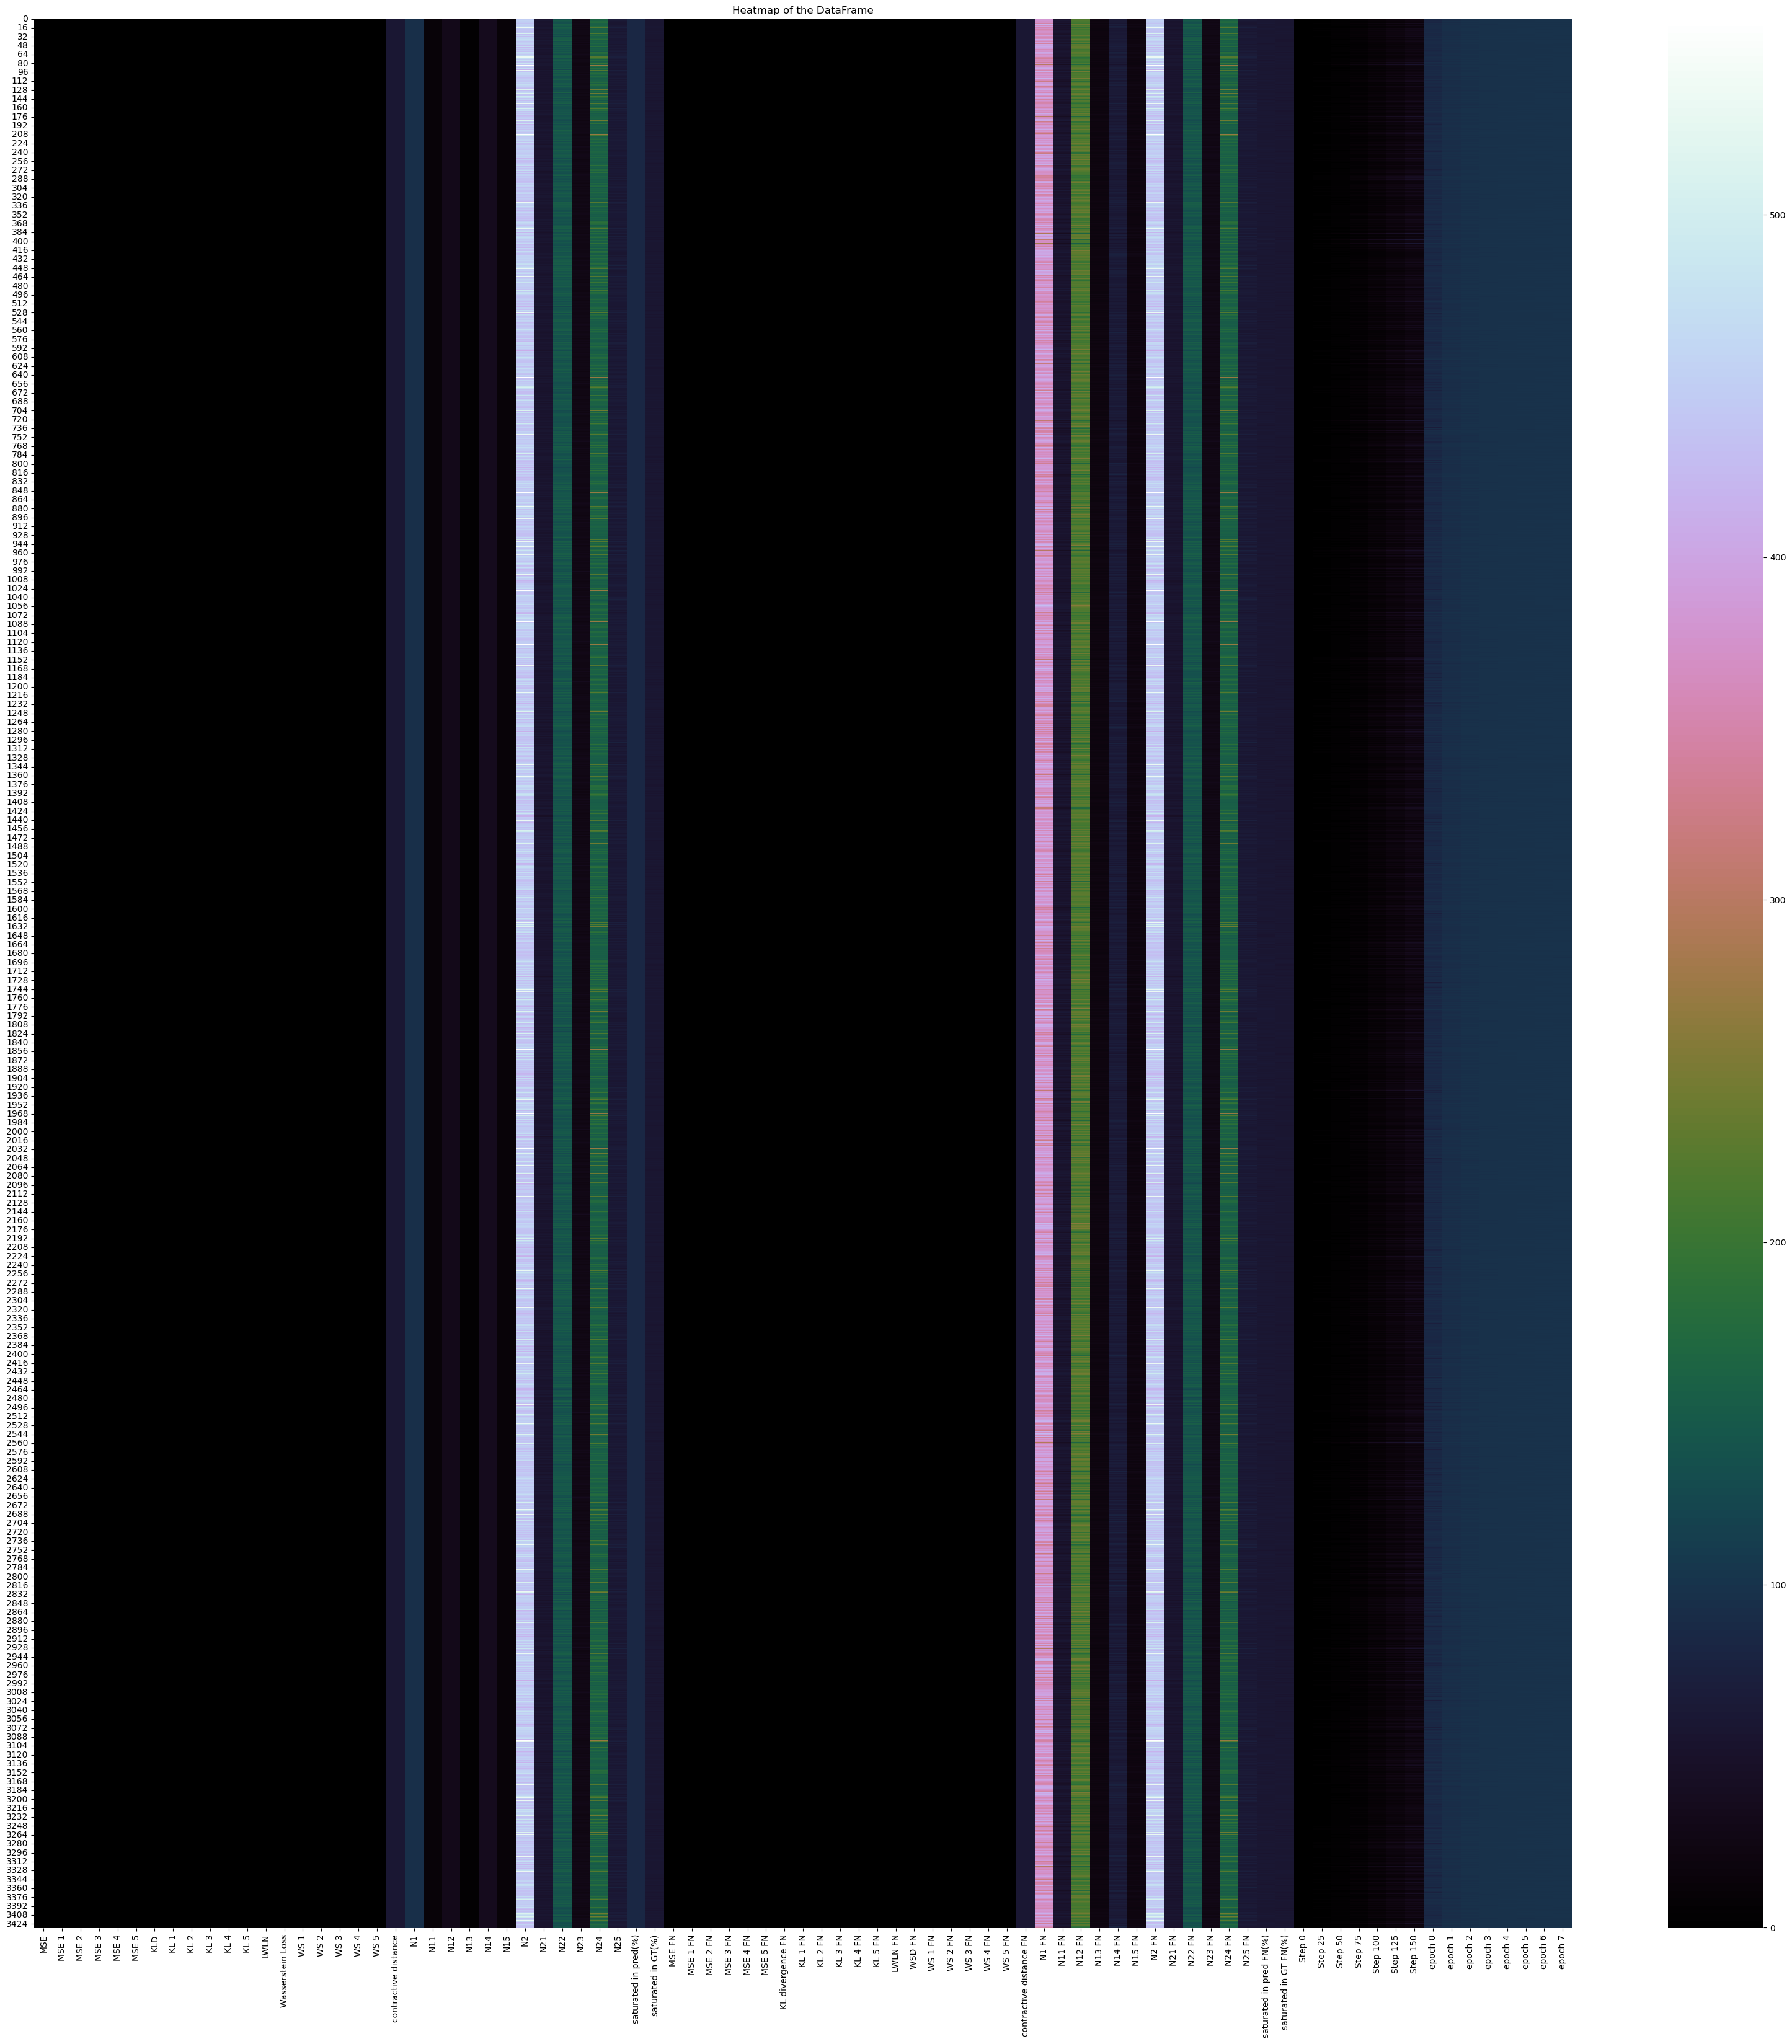

In [8]:


# Create a heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(result_cleaned[list(result_cleaned.columns)[2:]], annot=False, cmap='cubehelix')

# Show the plot
plt.title("Heatmap of the DataFrame")
plt.show()

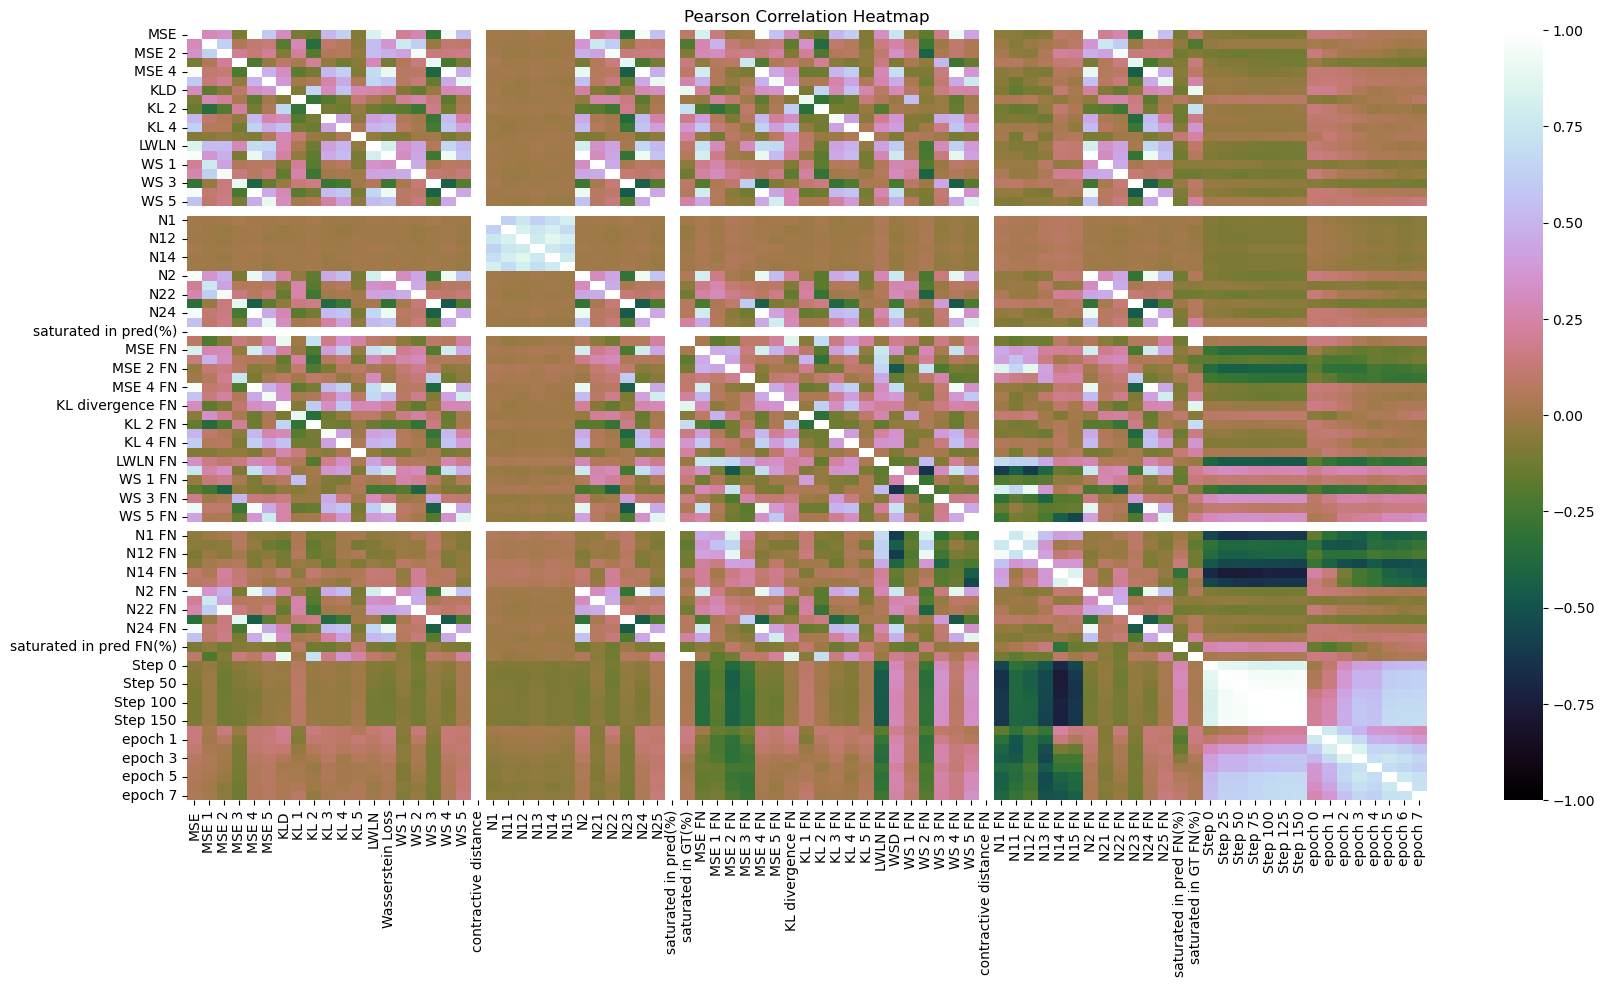

In [9]:
corr_matrix = result_cleaned[list(result_cleaned.columns)[2:]].corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=False, cmap='cubehelix', vmin=-1, vmax=1)

# Show the plot
plt.title("Pearson Correlation Heatmap")
plt.show()

In [10]:
GT=DF[Cols[2:2466]]
dataG=GT.to_numpy()
GT.head(2)

weight 0  weight 1  weight 2  weight 3  weight 4  weight 5  weight 6  \
0  0.164346 -0.337888  0.374003  0.067678 -0.104371 -0.609668 -0.162399   
1 -0.414606  0.083311 -0.027643 -0.128379 -0.436255 -0.297986  0.283499   

   weight 7  weight 8  weight 9  ...  bias 2454  bias 2455  bias 2456  \
0 -1.181392 -0.646072 -0.612219  ...   0.219033   0.116492   0.335208   
1  0.281313  0.155832  0.089412  ...  -0.113251   0.370089  -0.054602   

   bias 2457  bias 2458  bias 2459  bias 2460  bias 2461  bias 2462  bias 2463  
0   0.032996  -0.194515   0.255509  -0.017064  -0.046321  -0.236938  -0.306256  
1  -0.030530   0.089179   0.089467  -0.176190   0.201679  -0.098176  -0.137862  

[2 rows x 2464 columns]

In [11]:
PD=DF[Cols[2466:4930]]
dataP=PD.to_numpy()
PD.head(20)

Pred weight 0  Pred weight 1  Pred weight 2  Pred weight 3  Pred weight 4  \
0        0.001701       0.009964       0.011652      -0.009948       0.082981   
1        0.001701       0.009964       0.011652      -0.009948       0.082981   
2        0.001701       0.009964       0.011652      -0.009948       0.082981   
3        0.001701       0.009964       0.011652      -0.009948       0.082981   
4        0.001701       0.009964       0.011652      -0.009948       0.082981   
5        0.001701       0.009964       0.011652      -0.009948       0.082981   
6        0.001701       0.009964       0.011652      -0.009948       0.082981   
7        0.001701       0.009964       0.011652      -0.009948       0.082981   
8        0.001701       0.009964       0.011652      -0.009948       0.082981   
9        0.001701       0.009964       0.011652      -0.009948       0.082981   
10       0.001701       0.009964       0.011652      -0.009948       0.082981   
11       0.001701       0.009964       0.011652      -0.009948       0.082981   
12       0.001701       0.009964       0.011652      -0.009948       0.082981   
13       0.001701       0.009964       0.011652      -0.009948       0.082981   
14       0.001701       0.009964       0.011652      -0.009948       0.082981   
15       0.001701       0.009964       0.011652      -0.009948       0.082981   
16       0.001701       0.009964       0.011652      -0.009948       0.082981   
17       0.001701       0.009964       0.011652      -0.009948       0.082981   
18       0.001701       0.009964       0.011652      -0.009948       0.082981   
19       0.001701       0.009964       0.011652      -0.009948       0.082981   

    Pred weight 5  Pred weight 6  Pred weight 7  Pred weight 8  Pred weight 9  \
0       -0.133964       0.028899       0.030491       0.074481       0.008417   
1       -0.133964       0.028899       0.030491       0.074481       0.008417   
2       -0.133964       0.028899       0.030491       0.074481       0.008417   
3       -0.133964       0.028899       0.030491       0.074481       0.008417   
4       -0.133964       0.028899       0.030491       0.074481       0.008417   
5       -0.133964       0.028899       0.030491       0.074481       0.008417   
6       -0.133964       0.028899       0.030491       0.074481       0.008417   
7       -0.133964       0.028899       0.030491       0.074481       0.008417   
8       -0.133964       0.028899       0.030491       0.074481       0.008417   
9       -0.133964       0.028899       0.030491       0.074481       0.008417   
10      -0.133964       0.028899       0.030491       0.074481       0.008417   
11      -0.133964       0.028899       0.030491       0.074481       0.008417   
12      -0.133964       0.028899       0.030491       0.074481       0.008417   
13      -0.133964       0.028899       0.030491       0.074481       0.008417   
14      -0.133964       0.028899       0.030491       0.074481       0.008417   
15      -0.133964       0.028899       0.030491       0.074481       0.008417   
16      -0.133964       0.028899       0.030491       0.074481       0.008417   
17      -0.133964       0.028899       0.030491       0.074481       0.008417   
18      -0.133964       0.028899       0.030491       0.074481       0.008417   
19      -0.133964       0.028899       0.030491       0.074481       0.008417   

    ...  Pred bias 2454  Pred bias 2455  Pred bias 2456  Pred bias 2457  \
0   ...        0.015646        0.169371        0.028182       -0.000079   
1   ...        0.015646        0.169371        0.028182       -0.000079   
2   ...        0.015646        0.169371        0.028182       -0.000079   
3   ...        0.015646        0.169371        0.028182       -0.000079   
4   ...        0.015646        0.169371        0.028182       -0.000079   
5   ...        0.015646        0.169371        0.028182       -0.000079   
6   ...        0.015646        0.169371        0.028182       -0.000079   


In [12]:
FN=DF[Cols[4930:7394]]
dataF=FN.to_numpy()
FN.head()

FN weight 0  FN weight 1  FN weight 2  FN weight 3  FN weight 4  \
0    -0.232741     0.234690     0.307284     0.132504    -0.063901   
1     0.197486     0.548144     0.561828     0.465196     0.474390   
2    -0.235318     0.032734     0.456143     0.298361     0.397591   
3     0.504345     0.558317     0.530101     0.544685     0.652809   
4    -0.046185     0.399216     0.481119     0.404734     0.440428   

   FN weight 5  FN weight 6  FN weight 7  FN weight 8  FN weight 9  ...  \
0    -0.456295     0.249330     0.253777    -0.017084    -0.535179  ...   
1    -0.385799     0.141360     0.399795     0.402124    -0.005365  ...   
2    -0.779430     0.058692     0.474569     0.304140     0.247117  ...   
3     0.133287     0.386765     0.431416     0.391297     0.232634  ...   
4    -0.534187    -0.007585     0.371841     0.316288     0.112834  ...   

   FN bias 2454  FN bias 2455  FN bias 2456  FN bias 2457  FN bias 2458  \
0      0.002432      0.357454     -0.011330      0.029457      0.097487   
1     -0.046876      0.310547      0.011412      0.075217     -0.081713   
2      0.179278      0.124115      0.057047      0.042873     -0.038269   
3      0.044512      0.077528      0.317940     -0.056806      0.125086   
4      0.045959      0.317835      0.021767     -0.007339      0.032906   

   FN bias 2459  FN bias 2460  FN bias 2461  FN bias 2462  FN bias 2463  
0      0.012748     -0.041288     -0.028719     -0.074976     -0.134050  
1      0.362037      0.128514     -0.292203     -0.077797     -0.134054  
2      0.030060      0.064697     -0.030442     -0.077526     -0.134792  
3     -0.075383      0.023881     -0.029111     -0.076237     -0.133696  
4      0.273799     -0.184082      0.004914     -0.079075     -0.134995  

[5 rows x 2464 columns]

In [13]:
# Define filter function – can be any scikit-learn transformer
filter_func = Projection(columns=[0,1])
# Define cover
cover = CubicalCover(n_intervals=20, overlap_frac=0.5)
# Choose clustering algorithm – default is DBSCAN
clusterer = DBSCAN()

# Configure parallelism of clustering step
n_jobs = 8

# Initialise pipeline
pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=True,
   n_jobs=n_jobs)


In [14]:
plotly_params = {"node_trace": {"marker_colorscale": "Blues"}}
fig = plot_static_mapper_graph(
    pipe, dataG, color_data=dataG, plotly_params=plotly_params
)


[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.1s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   1.7s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   2.9s


In [15]:
fig.show(config={'scrollZoom': True})
plt.show()

In [16]:
import wandb
wandb.login(key="ab631efc36e2c87f5f54d82b5cdbd6c501d5221f")
run = wandb.init(
# Set the project where this run will be logged
project="aymen-project",
name= "ploting TDA" ,
# Track hyperparameters and run metadata
config={
   "batch_size":1
},)


#wandb.log({f"Mapper GT Graph 10 test set batches ":  wandb.Image(fig,caption=f"apper GT Graph 10 test set batches {500}")})

In [17]:
type(fig)

plotly.graph_objs._figurewidget.FigureWidget

In [18]:
import wandb
import plotly.graph_objects as go



# Convert FigureWidget to a Figure
fig1 = go.Figure(fig)

# Log the plotly figure# Save the figure as an image locally
fig1.write_image("annotated_plot.png")

# Log the image to WandB
wandb.log({"plot_image": wandb.Image("annotated_plot.png")})

# Finish the run
wandb.finish() 

In [19]:
fig1